<a href="https://colab.research.google.com/github/gurung-ajay/Vegetable-Image-Classification-with-CNN/blob/main/Vegetable_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vegetable Image Classification with CNN

Tools used: Tensorflow, OpenCV, Matplotlib, Numpy and Scikit Learn

In this project, I built a CNN model for image classification of vegetables. It is trained on data metioned below, which consists of images on 15 classes of vegetables, divided into:
* train data
* test data
* validation data

Data from:

[Dataset Citation](https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study)


kaggle link: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/

It contains equal number of images for each class of images.

In [1]:
!gdown https://drive.google.com/uc?id=1oIA6PMbmrTbDNJEsQZe_r-7U27IKemHj&export=download

Downloading...
From: https://drive.google.com/uc?id=1oIA6PMbmrTbDNJEsQZe_r-7U27IKemHj
To: /content/vegetable.zip
100% 560M/560M [00:11<00:00, 50.3MB/s]


In [ ]:
!unzip /content/vegetable.zip

# Importing Libraries

In [18]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Assigning train, test and validation data

In [4]:
batch_size = 32
image_size = (224, 224)

train_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/Vegetable Images/train',
    seed = 1,
    batch_size = batch_size,
    image_size = image_size
)

test_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/Vegetable Images/test',
    seed = 1,
    batch_size = batch_size,
    image_size = image_size
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/Vegetable Images/validation',
    seed = 1,
    batch_size = batch_size,
    image_size = image_size
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


# Building CNN model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1/255)) # scale pixel values to [0, 1]
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, input_shape = (224, 224, 3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3))
model.add(tf.keras.layers.MaxPool2D())


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))

model.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

## Training the model

In [7]:
history = model.fit(train_data, validation_data = valid_data, epochs = 7)

Epoch 1/7
469/469 [==============================] - 71s 150ms/step - loss: 0.6032 - accuracy: 0.8097 - val_loss: 0.7669 - val_accuracy: 0.7470
Epoch 2/7
469/469 [==============================] - 70s 149ms/step - loss: 0.4516 - accuracy: 0.8591 - val_loss: 0.5028 - val_accuracy: 0.8443
Epoch 3/7
469/469 [==============================] - 70s 150ms/step - loss: 0.2560 - accuracy: 0.9210 - val_loss: 0.4341 - val_accuracy: 0.8690
Epoch 4/7
469/469 [==============================] - 71s 150ms/step - loss: 0.2445 - accuracy: 0.9245 - val_loss: 0.5096 - val_accuracy: 0.8597
Epoch 5/7
469/469 [==============================] - 70s 148ms/step - loss: 0.7632 - accuracy: 0.7971 - val_loss: 0.5064 - val_accuracy: 0.8637
Epoch 6/7
469/469 [==============================] - 70s 150ms/step - loss: 0.1516 - accuracy: 0.9524 - val_loss: 0.3125 - val_accuracy: 0.9240
Epoch 7/7
469/469 [==============================] - 71s 150ms/step - loss: 0.1075 - accuracy: 0.9679 - val_loss: 0.3279 - val_accuracy:

The model scores accuracy of more than 90% on both training and validation data.

## Performance Monitoring

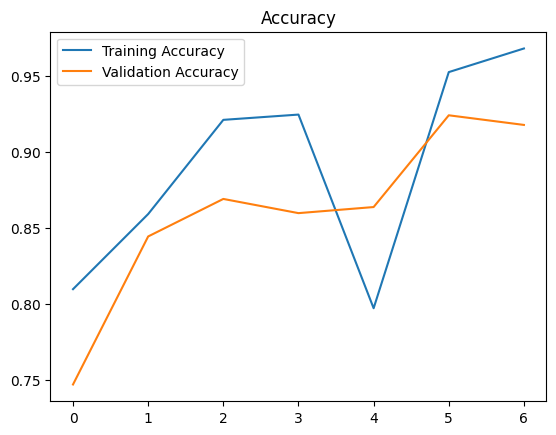

In [39]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

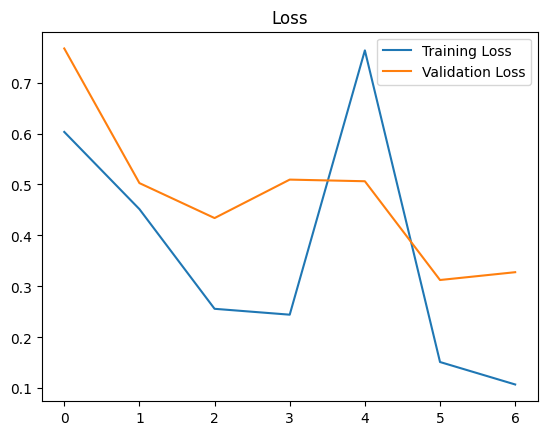

In [40]:
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

# Evaluating model on test data

In [ ]:
true_labels = []
predicted_labels = []

for batch_images, labels in test_data:
  # for predicted labels
  batch_predictions = model.predict(batch_images) # find probabilities of each class for given images with softmax in each batch (of 32 images)
  # (one batch per iteration)
  batch_pred_labels = np.argmax(batch_predictions, axis = 1) # find index having highest probability value. This index represents the label of predicted class.
  predicted_labels.extend(batch_pred_labels)  # adding pred class label to predicted_labels list

  # for true labels
  true_labels.extend(labels.numpy())

In [34]:
accuracy = accuracy_score(y_true = true_labels, y_pred = predicted_labels)
f1 = f1_score(y_true = true_labels, y_pred = predicted_labels, average = 'weighted')

print(f'Accuracy = {accuracy}\nF1 score = {f1}')

Accuracy = 0.9263333333333333
F1 score = 0.9264787662104991


On test data, this model is able to get very high accuracy score of about 92% and f1 score of 0.9265.

# Testing by predicting class for an image

## Test 1 on cabbage

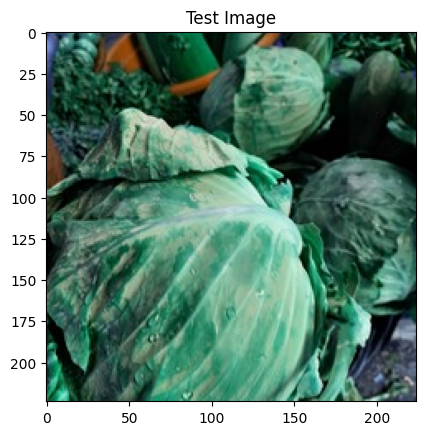

In [ ]:
test_img1 = cv2.imread('/content/Vegetable Images/test/Cabbage/0952.jpg')
plt.imshow(test_img1)
plt.title('Test Image')
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/Vegetable Images/test/Cabbage/0952.jpg', target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 391ms/step


In [ ]:
predictions[0]  # prediction, probability values for each classes

array([5.5069459e-04, 6.8485395e-05, 1.9089618e-06, 3.1833816e-03,
       1.3508504e-04, 9.9518788e-01, 3.1487011e-07, 3.5886166e-12,
       7.3070632e-04, 2.8801807e-05, 8.0578000e-05, 7.8044966e-09,
       1.8675713e-05, 7.4197749e-07, 1.2625273e-05], dtype=float32)

In [ ]:
test_data.class_names # class names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [ ]:
result_index = np.where(predictions[0] == max(predictions[0]))  # index of max probability value i.e. index of predicted class
result_index[0][0]

5

In [ ]:
print(f'The image belongs to class: {test_data.class_names[result_index[0][0]]}')
# printing class name with max probability value

The image belongs to class: Cabbage


## Test 2 on papaya

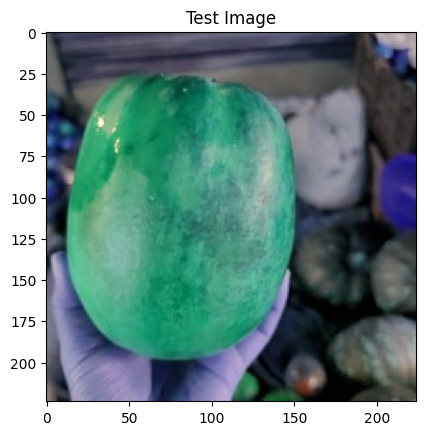

In [8]:
test_img2 = cv2.imread('/content/Vegetable Images/test/Papaya/1200.jpg', )
plt.imshow(test_img2)
plt.title('Test Image')
plt.show()

In [9]:
image2 = tf.keras.preprocessing.image.load_img('/content/Vegetable Images/test/Papaya/1200.jpg', target_size=(224,224))
input_arr2 = tf.keras.preprocessing.image.img_to_array(image2)
input_arr2 = np.array([input_arr2])
predictions2 = model.predict(input_arr2)
result_index2 = np.where(predictions2[0] == max(predictions2[0]))
print(f'The image belongs to class: {test_data.class_names[result_index2[0][0]]}')

1/1 [==============================] - 0s 422ms/step
The image belongs to class: Papaya


# Conclusion

After optimizing model with changing various hyperparameters and neural network complexity, I was able to obtain the model which scores good results and is also able to generalize well on new images of vegetables.

# Saving model

In [35]:
with open('vegetable_image_CNN_model.pickle', 'wb') as file:
  pickle.dump(model, file)

In [38]:
model.save('vegetable_image_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
